In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the csv file
df = pd.read_csv('nfl_betting.csv')

In [5]:
#remove the weather detail column because it is unstructred free text
#remove the schedule date because i have separate columns with year and week of the season as seperate columns
#remove gameid
#remove games that did not have a betting line and have not occured
new_df = df.drop(['weather_detail','schedule_date','game_id'], axis = 1).dropna(subset = ['over_under_line', 
                                                                                          'score_home', 'weather_temperature', 'weather_wind_mph'])

In [7]:
#replace text w/ numbers for the week 
new_df = new_df.replace(['Wildcard', 'WildCard','Division', 'Conference', 'Superbowl','SuperBowl'],[18,18,19,20,21,21])
#find what the column type is (convert everything to float>> new_df.dtypes
#convert 'schedule_week' from object to float
new_df['schedule_week'] = new_df.schedule_week.astype(float)
#convert the over underline from object to float
new_df.over_under_line = pd.to_numeric(new_df.over_under_line, errors = 'coerce')
#change humidity to a float and if there are erros change to NaN
new_df.weather_humidity = pd.to_numeric(new_df.weather_humidity, errors = 'coerce')
new_df.columns
box_plot = np.array(new_df['over_under_line'])

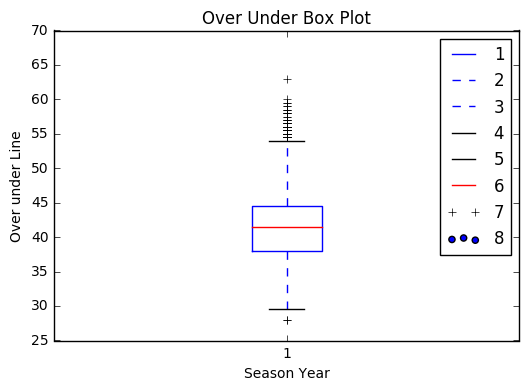

In [8]:
plt.boxplot(box_plot)
plt.scatter(new_df['schedule_season'],new_df['over_under_line'])
plt.ylabel('Over under Line')
plt.xlabel('Season Year')
plt.legend('12345678' )
plt.title('Over Under Box Plot')
plt.show()

In [6]:
new_df.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,9296.000000,9296.000000,9296.000000,9296.000000,9296.000000,9296.000000
mean,1998.929755,-5.348160,59.591652,7.462242,22.513339,19.786790
std,11.211571,3.414221,15.447166,5.696075,10.352862,10.040271
min,1967.000000,-26.500000,-6.000000,0.000000,0.000000,0.000000
25%,1990.000000,-7.000000,49.000000,2.000000,15.000000,13.000000
50%,1999.000000,-4.500000,63.000000,8.000000,22.000000,20.000000
75%,2009.000000,-3.000000,72.000000,11.000000,30.000000,27.000000
max,2017.000000,0.000000,95.000000,40.000000,62.000000,59.000000


In [9]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list


In [10]:
years_only = Remove(new_df['schedule_season'])

In [ ]:
df.grouby('over_under_line').agg()

In [12]:
#grab words that have # in fromt of the word
description = pd.Series(['#altair #pandas at project night'])
description.str.findall(r'#.*?(?=\s|$)').tolist()

[['#altair', '#pandas']]

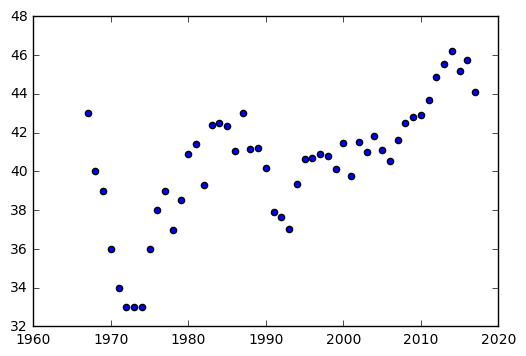

In [11]:
#plot the average over under by year
season_avgs = new_df.groupby('schedule_season').mean()
season_avgs['over_under_line']
plt.scatter(years_only, season_avgs['over_under_line'])
plt.show()

4.54515733470958

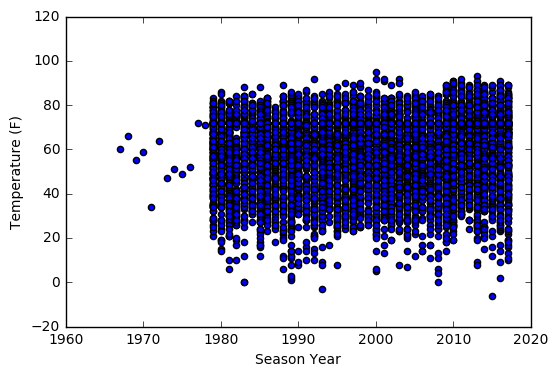

In [6]:
plt.scatter(new_df['schedule_season'],new_df['weather_temperature'])
plt.ylabel('Temperature (F)')
plt.xlabel('Season Year')
plt.show()

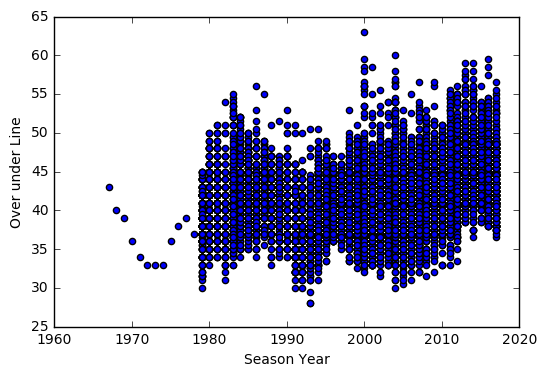

In [16]:
plt.scatter(new_df['schedule_season'],new_df['over_under_line'])
plt.ylabel('Over under Line')
plt.xlabel('Season Year')
plt.show()

In [5]:
#replace NaN with a value 45
#The NaN cells were when games were played inside, so I took an average indoor humidity
new_df.weather_humidity.fillna(45, inplace = True)
#overunder line; weathertemp; weather wind mph need zeros filled in
#new_df.count()

In [6]:
#split the columns into independent and dependent variables then recombine
#dependent variable is in the middle of independent variables
x1 = new_df.iloc[:,0:11]
x2 = new_df.iloc[:,13:15]
x = pd.merge(x1, x2, left_index = True, right_index = True).values

In [7]:
#encode categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
#home team
x[:,2] = labelencoder_x.fit_transform(x[:,2])
#away team
x[:,3] = labelencoder_x.fit_transform(x[:,3])
#stadium
x[:,4] = labelencoder_x.fit_transform(x[:,4])
#team favorite
x[:,5] = labelencoder_x.fit_transform(x[:,5])
#neutral stadium? (True = neutral)
x[:,11] = labelencoder_x.fit_transform(x[:,11])
#playoff game?(True = playoff game)
x[:,12] = labelencoder_x.fit_transform(x[:,12])

In [8]:
#create over under line as independent variable
new_df['actual_score'] = new_df.score_home + new_df.score_away
#use lambda function to create the boolean to state if the score was over or under
new_df['over_line']=new_df.apply(lambda row: 1 if row.actual_score > row.over_under_line else 0, axis = 1)

In [9]:
#Create the dependent variable
y = new_df.iloc[:,16].values

In [10]:
#Split the Data into testing and Training set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
#Feature Scaling using Standard Sclaer
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

C:\Users\cudolan\Desktop\New folder\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cudolan\Desktop\New folder\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cudolan\Desktop\New folder\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)

dtree.fit(x_train, y_train)
ypred = dtree.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[702, 507],
       [638, 477]])

In [29]:
#Fit logistic regression to training set
from sklearn.svm import SVC
classifier = SVC(C = 2,kernel = 'linear', degree = 3)
classifier.fit(x_train, y_train)
#Predict test set results with the Logistic Regression model
y_pred = classifier.predict(x_test)
#Evaluate Logistic regression model with Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[829, 380],
       [724, 391]])